# Stochastic Gradient Descent (SGD)

## Theoretical Approach

Stochastic Gradient Descent (SGD) is an optimization approach where the gradient is approximated using a **single training example** $(x^{(i)}, y^{(i)})$ chosen at random for each iteration. Unlike Batch Gradient Descent, which calculates the exact gradient by averaging over the entire dataset, SGD uses the gradient of the loss from one sample as an unbiased estimator of the true gradient. This introduces noise into the optimization path, causing the loss to fluctuate, but allows for significantly more frequent parameter updates.

## Mathematical Formulation

### 1. Instantaneous Cost Function
Instead of minimizing the average loss over the entire dataset, SGD considers the loss function for a specific, randomly selected sample $i$ at each step:

$$
J(\theta; x^{(i)}, y^{(i)}) = \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = \frac{1}{2} (\hat{y}^{(i)} - y^{(i)})^2
$$

### 2. The Stochastic Gradient
The gradient is computed with respect to the parameters $\theta$ using only the $i$-th sample. Consequently, the parameters are updated immediately after processing this single sample, rather than waiting for the entire dataset to be evaluated. This removes the summation over $N$ found in batch methods:

$$
\nabla_\theta J(\theta) \approx \nabla_\theta \mathcal{L}(\hat{y}^{(i)}, y^{(i)})
$$

### Libraries Import

In [36]:
import numpy as np
import matplotlib.pyplot as plt

### Initial Configuration

In [37]:
# Defining target function for approximation
target_function = lambda x: np.sin(x)

# Data generation
domain_start = 0.0
domain_end = 4 * np.pi
sample_size = 200

# Network hyperparameters
hidden_neurons = 32
learning_rate = 0.03
intermediate_generations = 50000
total_generations = 200000

# Activation function
activation_function = "sigmoid"

# Matplotlib setup
plt.style.use("ggplot")
%matplotlib inline

### Activation Functions

In [38]:
# Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_d(x):
    s = sigmoid(x)
    return s * (1 - s)

# Tanh
def tanh(x):
    return np.tanh(x)

def tanh_d(x):
    return 1 - np.tanh(x)**2

# ReLU
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return np.where(x > 0, 1, 0)

# Function dictionary
activations ={"sigmoid": (sigmoid, sigmoid_d), "tanh": (tanh, tanh_d), "relu": (relu, relu_d)}

selected_activation, selected_derivative = activations[activation_function]

### Visualizing Target Function

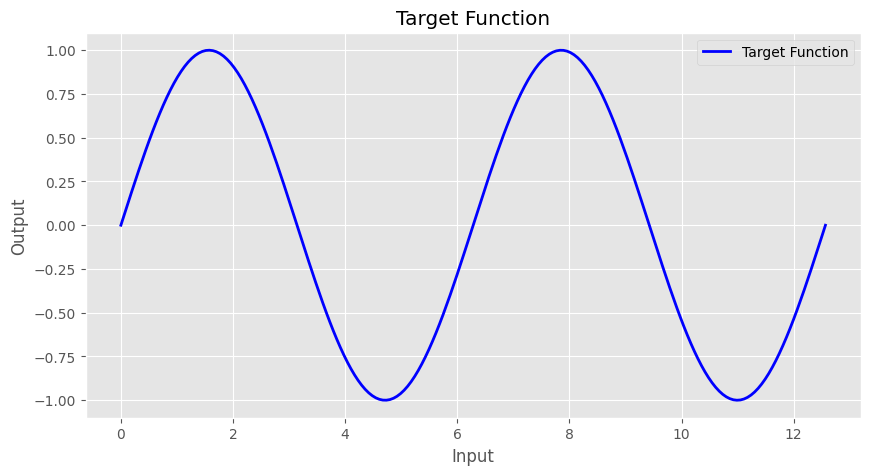

In [39]:
# Generation of vertical input vector
X = np.linspace(domain_start, domain_end, sample_size).reshape(-1, 1)

# Generation of horizontal target vector
Y = target_function(X)

# Plotting the target function
plt.figure(figsize=(10, 5))
plt.plot(X, Y, label="Target Function", color="blue", linewidth=2)
plt.title("Target Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.show()

### Neural Network via STochastic Gradient Descent

In [40]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, lr, act_func, act_deriv):
        self.lr = lr
        self.act_func = act_func
        self.act_deriv = act_deriv

        # Initializing weights and with small values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1

        # Initializing biases with zeros
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        # Input Layer -> Hidden Layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.act_func(self.z1)

        # Hidden Layer -> Output Layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, X, y, output):
        # The batch size is a single sample
        batch_size = X.shape[0]

        # Defining the error
        error = output - y

        # Gradient for output layer
        d_output = error * 1

        dW2 = np.dot(self.a1.T, d_output) / batch_size
        db2 = np.sum(d_output, axis=0, keepdims=True) / batch_size

        # Gradient for hidden layer
        d_hidden = np.dot(d_output, self.W2.T) * self.act_deriv(self.z1)

        dW1 = np.dot(X.T, d_hidden) / batch_size
        db1 = np.sum(d_hidden, axis=0, keepdims=True) / batch_size

        # Gradient descent step
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

        # Mean squared error
        return np.mean(np.square(error))

### Model Training

In [41]:
# 1. Instantiate the Model
model = NeuralNetwork(input_size=1, hidden_size=hidden_neurons, output_size=1, lr=learning_rate, act_func=selected_activation, act_deriv=selected_derivative)

loss_history = []

# Intermediate Training
print(f"Training for {intermediate_generations} generations...")
for i in range(intermediate_generations):
    # Selection of random sample
    random_index = np.random.randint(0, sample_size)
    X_sample = X[random_index:random_index+1]
    Y_sample = Y[random_index:random_index+1]

    # Forward pass
    prediction = model.forward(X_sample)

    # Backward pass
    loss = model.backward(X_sample, Y_sample, prediction)
    loss_history.append(loss)

    # Print the current loss in given steps
    current_loss_step = 10000
    if i % current_loss_step == 0:
        print(f"Current Loss: {loss:.5f}")

# Intermediate Prediction (Visualize on full dataset)
print("Intermediate Training Complete.")
prediction_intermediate = model.forward(X)

# Final Training
remaining_generations = total_generations - intermediate_generations
print(f"Training for further {remaining_generations} generations...")

for i in range(remaining_generations):
    # Selection of random sample
    random_index = np.random.randint(0, sample_size)
    X_sample = X[random_index:random_index+1]
    Y_sample = Y[random_index:random_index+1]

    # Forward pass
    prediction = model.forward(X_sample)

    # Backward pass
    loss = model.backward(X_sample, Y_sample, prediction)
    loss_history.append(loss)

    # Print the current loss in given steps
    current_loss_step = 10000
    if i % current_loss_step == 0:
        print(f"Current Loss: {loss:.5f}")

# Final Prediction (Visualize on full dataset)
prediction_final = model.forward(X)
print("Training Complete.")

Training for 50000 generations...
Current Loss: 1.27801
Current Loss: 0.01692
Current Loss: 0.02868
Current Loss: 0.00016
Current Loss: 0.53176
Intermediate Training Complete.
Training for further 150000 generations...
Current Loss: 0.99530
Current Loss: 0.01372
Current Loss: 1.73288
Current Loss: 0.15717
Current Loss: 0.02729
Current Loss: 0.00007
Current Loss: 0.00532
Current Loss: 0.06037
Current Loss: 0.02668
Current Loss: 0.00546
Current Loss: 0.24724
Current Loss: 0.04048
Current Loss: 0.32838
Current Loss: 0.00977
Current Loss: 0.00215
Training Complete.


### Visualizing Approximation

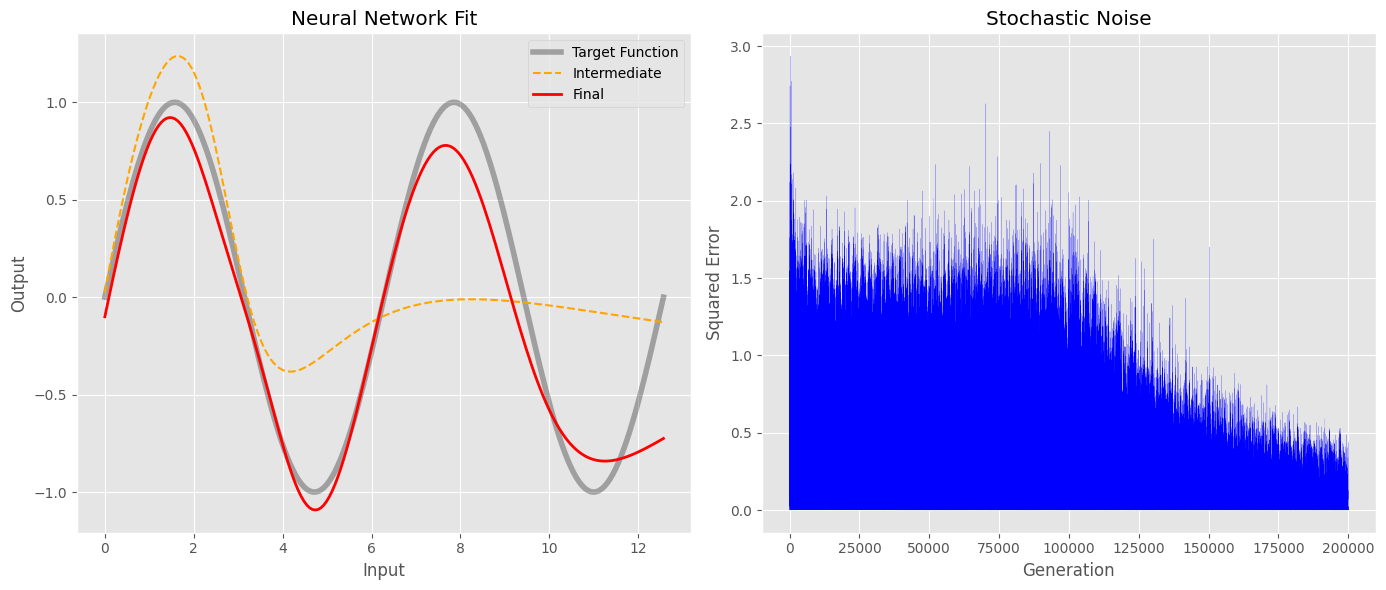

In [43]:
plt.figure(figsize=(14, 6))

# Plotting the function approximation
plt.subplot(1, 2, 1)
plt.plot(X, Y, label="Target Function", color="black", alpha=0.3, linewidth=4)
plt.plot(X, prediction_intermediate, label="Intermediate", color="orange", linestyle="--")
plt.plot(X, prediction_final, label="Final", color="red", linewidth=2)
plt.title("Neural Network Fit")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()

# Plotting the learning curve
plt.subplot(1, 2, 2)
plt.plot(loss_history, color="blue", linewidth=0.1)
plt.title("Stochastic Noise")
plt.xlabel("Generation")
plt.ylabel("Squared Error")

plt.tight_layout()
plt.show()